### Load Data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!wget 'https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip' 

--2020-07-07 00:53:56--  https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3380245855 (3.1G) [application/zip]
Saving to: ‘MURA-v1.1.zip’

MURA-v1.1.zip       100%[===================>]   3.15G  10.8MB/s    in 4m 28s  

2020-07-07 00:58:24 (12.0 MB/s) - ‘MURA-v1.1.zip’ saved [3380245855/3380245855]



In [ ]:
!unzip MURA-v1.1.zip 

Streaming output truncated to the last 5000 lines.
   creating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image1.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image3.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image2.png  
   creating: MURA-v1.1/train/XR_SHOULDER/patient01016/
   creating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image1.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image3.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image2.png  
   creating: MURA-v1.1/train/XR_SHOULDER/patient01182/
   creating: MURA-v1.1/train/XR_SHOULDER/patient01182/study1_positive/
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01182/study1_positive/image1.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/pati

In [ ]:
drive_path='/content/drive/My Drive/MURA Challenge/data/'
path='/content/drive/My Drive/MURA Challenge/data/MURA-v1.1/'
colab_path='/content/MURA-v1.1/'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from tqdm import tqdm
from glob import glob
import tensorflow as tf
from tensorflow import keras

In [ ]:
# os.listdir(path)

In [ ]:
train_imgs_path=pd.read_csv(colab_path+'train_image_paths.csv',dtype=str,header=None,names=['Img_Path'])
train_labels=pd.read_csv(colab_path+'train_labeled_studies.csv',dtype=str,names=['Img_Path','Label'],header=None)
test_imgs_path=pd.read_csv(colab_path+'valid_image_paths.csv',dtype=str,header=None,names=['Img_Path'])
test_labels=pd.read_csv(colab_path+'valid_labeled_studies.csv',dtype=str,names=['Img_Path','Label'],header=None)

In [ ]:
def keep_dir(dir):
  x=list(dir.split('/'))
  x='/'.join(x[:5])
  x=x+'/'
  return x
def keep_dir2(dir):
  x=list(dir.split('/'))
  x='/'.join(x[3:5])
  x=x+'/'
  return x

In [ ]:
keep_dir('MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png')

'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/'

In [ ]:
train_imgs_path['path_to_merge']=train_imgs_path['Img_Path'].apply(lambda x: keep_dir(x))
test_imgs_path['path_to_merge']=test_imgs_path['Img_Path'].apply(lambda x: keep_dir(x))

In [ ]:
train_data=train_imgs_path.merge(train_labels,how='inner',left_on='path_to_merge', right_on='Img_Path')
test_data=test_imgs_path.merge(test_labels,how='inner',left_on='path_to_merge', right_on='Img_Path')

In [ ]:
train_data['Body_Part']=train_data['Img_Path_x'].apply(lambda x: str(x.split('/')[2]))
test_data['Body_Part']=test_data['Img_Path_x'].apply(lambda x: str(x.split('/')[2]))
train_data['Patient/Study']=train_data['Img_Path_x'].apply(lambda x: str(x.split('/')[3:5]))
test_data['Patient/Study']=test_data['Img_Path_x'].apply(lambda x: str(x.split('/')[3:5]))
train_data['Patient/Study']=train_data['Img_Path_x'].apply(lambda x: keep_dir2(x) )
test_data['Patient/Study']=test_data['Img_Path_x'].apply(lambda x: keep_dir2(x) )
train_data.drop(columns=['path_to_merge','Img_Path_y'],inplace=True)
train_data.rename(columns={'Img_Path_x':'Img_Path'},inplace=True)
test_data.drop(columns=['path_to_merge','Img_Path_y'],inplace=True)
test_data.rename(columns={'Img_Path_x':'Img_Path'},inplace=True)

test_labels['Body_Part']=test_labels['Img_Path'].apply(lambda x: str(x.split('/')[2]))
test_labels['Patient/Study']=test_labels['Img_Path'].apply(lambda x:  keep_dir2(x))


# train_data.Img_Path=train_data.Img_Path.apply(lambda x: drive_path+x)
# test_data.Img_Path=test_data.Img_Path.apply(lambda x: drive_path+x)

In [ ]:
train_data.head()

,Img_Path,Label,Body_Part,Patient/Study
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,XR_SHOULDER,patient00001/study1_positive/
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,XR_SHOULDER,patient00001/study1_positive/
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study...,1,XR_SHOULDER,patient00001/study1_positive/
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,XR_SHOULDER,patient00002/study1_positive/
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study...,1,XR_SHOULDER,patient00002/study1_positive/


In [ ]:
test_data.head()

,Img_Path,Label,Body_Part,Patient/Study
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,XR_WRIST,patient11185/study1_positive/
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,XR_WRIST,patient11185/study1_positive/
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,XR_WRIST,patient11185/study1_positive/
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_p...,1,XR_WRIST,patient11185/study1_positive/
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_p...,1,XR_WRIST,patient11186/study1_positive/


### Define Evaluation metrics & Helper Functions


In [ ]:
import keras.backend as K
def recall(y_true, y_pred):
    
    """
    Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    
    """
    Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))


import gc

def clean_up(model):
    K.clear_session()
    del model
    gc.collect()


Using TensorFlow backend.


In [ ]:
# for visualizing the training progress of our models
%matplotlib inline
import matplotlib.pyplot as plt
def viz_history(hs_dict,metric):
  plt.style.use('dark_background')
  plt.rcParams['figure.figsize'] = [15, 8]
  plt.rcParams['font.size'] = 16
  plt.clf()
  for model in hs_dict.keys():
    plt.plot(hs_dict[model].history[metric],label='{0:s} train {1:s}'.format(model, metric))
    plt.plot(hs_dict[model].history['val_{0:s}'.format(metric)],label='{0:s} validation {1:s}'.format(model, metric))
    plt.ylabel(metric) 
    plt.xlabel('epoch')
    plt.legend()
  plt.show()

### Prep Data For Training




In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [ ]:
shuffled=train_data.sample(frac=1)

In [ ]:
msk = np.random.rand(len(shuffled)) <0.8

train = shuffled[msk]

val= shuffled[~msk]

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import ResNet101
from keras.applications.densenet import DenseNet169
from keras.callbacks import *
import pickle

In [ ]:
def configurable_train_model(
        upper_layers_optimizer,
        full_network_optimizer,
        upper_layers_epochs=15,
        full_network_epochs=10,
        body_type='XR_ELBOW',
        input_shape=(224,224,3),
        mlp_hidden_layers=[512],
        mlp_hidden_activation='relu',
        mlp_dropout=0.2,
        output_activation='softmax',
        pretrained_model=VGG16,
        batch_norm=True,
        callbacks_upper=None,
        callbacks_full=None,
        batch_size=32,
        class_weights=None,
        classes=2,
        verbose=1):
    
    np.random.seed(1402) # Define the seed for numpy to have reproducible experiments.
   

    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      horizontal_flip=True,
  )

    val_datagen=ImageDataGenerator(
        rescale=1./255)


    train_generator=train_datagen.flow_from_dataframe(
        dataframe=train[train.Body_Part==body_type],
        directory=None,
        x_col="Img_Path",
        y_col="Label",
        weight_col=None,
        target_size=(224, 224),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=False,
        seed=1,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        interpolation="nearest",
        validate_filenames=False,
    )

    val_generator=val_datagen.flow_from_dataframe(
        dataframe=val[val.Body_Part==body_type],
        directory=None,
        x_col="Img_Path",
        y_col="Label",
        weight_col=None,
        target_size=(224, 224),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=False,
        seed=1,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        interpolation="nearest",
        validate_filenames=False
    )

    #model parameters for training
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=val_generator.n//val_generator.batch_size



    base_model =pretrained_model(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling='avg'
    )


    x = base_model.output
    # Define MLP layers.
    for i, units in enumerate(mlp_hidden_layers):
        x = Dense(
            units=units,
            kernel_initializer='glorot_uniform',
            activation=mlp_hidden_activation,
            name='Hidden-{0:d}'.format(i + 1)
        )(x)
        if mlp_dropout > 0:
            x = Dropout(rate=mlp_dropout)(x)
   
    
    # Define the output layer.
    output = Dense(
        units=classes,
        activation=output_activation,
        name='Output'
    )(x)

    # Define the model and train it.
    model = Model(inputs=base_model.input, outputs=output)

    # First train the upper layers for a few epochs
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=upper_layers_optimizer, loss='categorical_crossentropy', metrics=['accuracy',f1])
    if class_weights:
      hs_upper_layers = model.fit(
        train_generator,
        epochs=upper_layers_epochs,
        steps_per_epoch=STEP_SIZE_TRAIN,
        validation_data=val_generator,
        validation_steps=STEP_SIZE_VALID,
        callbacks=callbacks_upper,
        class_weight=class_weights[body_type],
        verbose=1
      )
    else:
      hs_upper_layers = model.fit(
        train_generator,
        epochs=upper_layers_epochs,
        steps_per_epoch=STEP_SIZE_TRAIN,
        validation_data=val_generator,
        validation_steps=STEP_SIZE_VALID,
        callbacks=callbacks_upper,
        verbose=1
      )
    print('Finished training upper layers.')
    print('------------------')

    # Now train the whole network with a low learning rate
    for layer in base_model.layers:
        layer.trainable = True
    
    model.compile(optimizer=full_network_optimizer, loss='categorical_crossentropy', metrics=['accuracy',f1])
    model.summary() # Print a description of the model.
    if class_weights:
      hs_full_network = model.fit(
        train_generator,
        epochs=full_network_epochs,
        steps_per_epoch=STEP_SIZE_TRAIN,
        validation_data=val_generator,
        validation_steps=STEP_SIZE_VALID,
        callbacks=callbacks_full,
        class_weight=class_weights[body_type],
        verbose=1
      )
    else:
      hs_full_network = model.fit(
        train_generator,
        epochs=full_network_epochs,
        steps_per_epoch=STEP_SIZE_TRAIN,
        validation_data=val_generator,
        validation_steps=STEP_SIZE_VALID,
        callbacks=callbacks_full,
        verbose=1
      )
    print('Finished training full network.')
    print('------------------')

    
    return model,  hs_full_network


In [ ]:
def train_model(
        optimizer,
        body_type='XR_ELBOW',
        size=224,
        output_activation='softmax',
        full_network_epochs=10,
        callbacks=None,
        batch_size=32,
        verbose=1,
        class_weights=None,
        transfer_model=VGG16,
        batch_norm=True,
        
        ):
    
    input_shape=(size,size,3)

    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      horizontal_flip=True,
  )

    train_generator=train_datagen.flow_from_dataframe(
        dataframe=train[train.Body_Part==body_type],
        directory=None,
        x_col="Img_Path",
        y_col="Label",
        weight_col=None,
        target_size=(size, size),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=False,
        seed=1,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        interpolation="nearest",
        validate_filenames=False,
    )

    val_datagen=ImageDataGenerator(
        rescale=1./255)

    val_generator=val_datagen.flow_from_dataframe(
        dataframe=val[val.Body_Part==body_type],
        directory=None,
        x_col="Img_Path",
        y_col="Label",
        weight_col=None,
        target_size=(size, size),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=False,
        seed=1,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        interpolation="nearest",
        validate_filenames=False
    )

    #model parameters for training
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=val_generator.n//val_generator.batch_size



    base_model = transfer_model(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling='avg',
    )


    
    x = base_model.output
    output = Dense(2, activation='softmax', name='predictions')(x)
    model = Model(inputs=base_model.input, output=output)

    for layer in base_model.layers:
            layer.trainable = True

    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy',f1])
    if class_weights:
      hs_full_network = model.fit(
        train_generator,
        epochs=full_network_epochs,
        steps_per_epoch=STEP_SIZE_TRAIN,
        validation_data=val_generator,
        validation_steps=STEP_SIZE_VALID,
        callbacks=callbacks,
        class_weight=class_weights[body_type],
        verbose=1
      )
    else:
      hs_full_network = model.fit(
        train_generator,
        epochs=full_network_epochs,
        steps_per_epoch=STEP_SIZE_TRAIN,
        validation_data=val_generator,
        validation_steps=STEP_SIZE_VALID,
        callbacks=callbacks,
        verbose=1
      )
    model.summary() # Print a description of the model.
    print('Finished training full network.')
    print('------------------')

    return model, hs_full_network

In [ ]:
from sklearn.metrics import *
def evaluate_model(
    body_part='XR_ELBOW',
    model=None
):
  test_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      horizontal_flip=True,)
  
  test_generator=test_datagen.flow_from_dataframe(
      dataframe=test_data[test_data.Body_Part==body_part],
      directory=None,
      x_col="Img_Path",
      y_col="Label",
      weight_col=None,
      target_size=(224, 224),
      color_mode="rgb",
      classes=None,
      class_mode="categorical",
      batch_size=128,
      shuffle=False,
      seed=1,
      save_to_dir=None,
      save_prefix="",
      save_format="png",
      interpolation="nearest",
      validate_filenames=False
  )

  tta_steps = 10
  predictions = []

  for i in tqdm(range(tta_steps)):
      preds = model.predict(test_generator,verbose=1)
      predictions.append(preds)


  preds = np.mean(predictions, axis=0)

  voting_df=pd.DataFrame(data=np.c_[test_data[test_data.Body_Part==body_part]['Patient/Study'].values,preds],
                       columns=['Patient/Study','Class 0 prob','Class 1 prob'])
  
  voting_df[['Class 0 prob', 'Class 1 prob']] = voting_df[['Class 0 prob', 'Class 1 prob']].apply(pd.to_numeric)   
  voting_df=voting_df.groupby('Patient/Study').mean().reset_index()
  voting_df['Class_prediction']=np.argmax(voting_df.iloc[:,1:3].values,axis=1)
  voting_df=voting_df.merge(test_labels[test_labels.Body_Part==body_part],how='inner',on='Patient/Study')
  voting_df=voting_df.drop(columns=['Img_Path'])
  voting_df['Label'] = voting_df['Label'].apply(pd.to_numeric) 
  kappa_score=cohen_kappa_score(voting_df.Class_prediction,voting_df.Label)
  f1=f1_score(voting_df.Class_prediction,voting_df.Label)
  return [kappa_score,f1,voting_df]

## Train Body Parts

In [ ]:
path_to_saved_models='/content/drive/My Drive/Deep Learning/vgg_models/'
path_to_saved_hist='/content/drive/My Drive/Deep Learning/vgg_hist/'

In [ ]:
store_results={}

#### ELBOW

#### Monitor f1


Found 3962 non-validated image filenames belonging to 2 classes.
Found 969 non-validated image filenames belonging to 2 classes.
Epoch 1/10
123/123 [==============================] - 77s 623ms/step - loss: 0.6698 - accuracy: 0.5967 - f1: 0.5965 - val_loss: 0.6254 - val_accuracy: 0.6458 - val_f1: 0.6458
Epoch 2/10
123/123 [==============================] - 76s 617ms/step - loss: 0.6344 - accuracy: 0.6486 - f1: 0.6486 - val_loss: 0.6776 - val_accuracy: 0.5806 - val_f1: 0.5747
Epoch 3/10
123/123 [==============================] - 75s 613ms/step - loss: 0.6246 - accuracy: 0.6527 - f1: 0.6524 - val_loss: 0.6418 - val_accuracy: 0.6884 - val_f1: 0.6878
Epoch 4/10
123/123 [==============================] - 75s 609ms/step - loss: 0.6209 - accuracy: 0.6578 - f1: 0.6576 - val_loss: 0.5998 - val_accuracy: 0.6339 - val_f1: 0.6400
Epoch 5/10
123/123 [==============================] - 75s 607ms/step - loss: 0.6086 - accuracy: 0.6715 - f1: 0.6715 - val_loss: 0.6355 - val_accuracy: 0.6894 - val_f1: 0.6

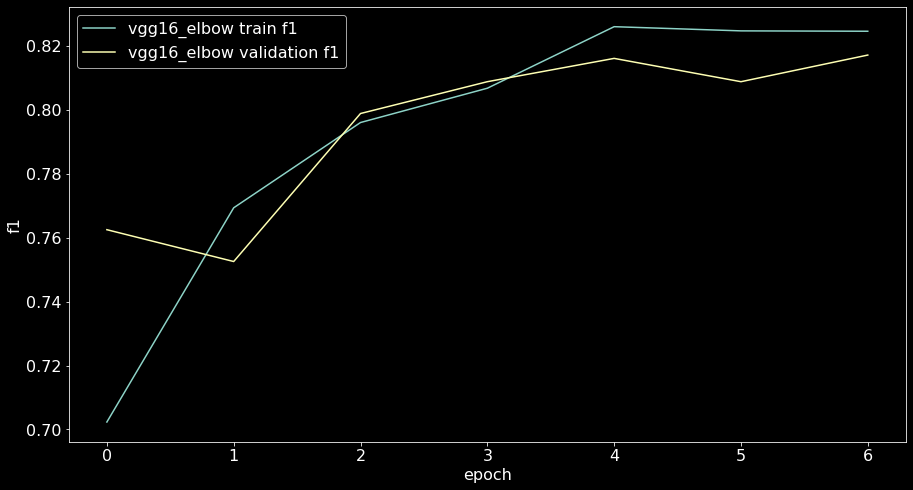

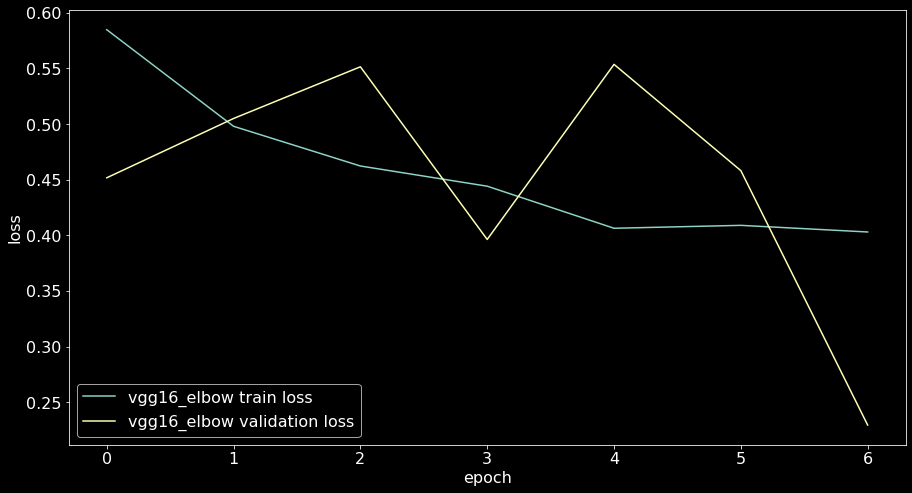

In [ ]:
callbacks_upper= [EarlyStopping(monitor='val_f1', patience=5, verbose=1,restore_best_weights=True)]
callbacks_full = [EarlyStopping(monitor='val_f1', patience=5, verbose=1,restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_f1', factor=0.1, patience=2,cooldown=2, verbose=1, mode='auto'),
            ModelCheckpoint(filepath=path_to_saved_models+'XR_ELBOW_best_model_vgg16.h5', monitor='val_f1', save_best_only=True)]

upper_layers_optimizer = Adam()
full_network_optimizer = Adam(1e-5)

# vgg16_model,vgg16_hs = train_model(pooling='avg',
#     body_type='XR_ELBOW',
#     full_network_epochs=20,
#     optimizer=optimizer,
#     output_activation='softmax',
#     callbacks_list=callback_list ,
#     verbose=1)


vgg16_model,vgg16_hs = configurable_train_model(batch_size=32,
                                                mlp_hidden_layers=[512],
                                                full_network_epochs=15,
                                                upper_layers_epochs=10,
                                                upper_layers_optimizer=upper_layers_optimizer,
                                                full_network_optimizer=full_network_optimizer,
                                                body_type='XR_ELBOW',
                                                output_activation='softmax',
                                                class_weights=None,
                                                callbacks_upper=callbacks_upper,
                                                callbacks_full=callbacks_full,
                                                verbose=1)



viz_history(hs_dict={'vgg16_elbow':vgg16_hs},metric='f1')
viz_history(hs_dict={'vgg16_elbow':vgg16_hs},metric='loss')

with open(path_to_saved_hist+'XR_ELBOW_hist', 'wb') as file_pi:
        pickle.dump(vgg16_hs.history, file_pi)

In [ ]:
test_datagen = ImageDataGenerator(
      rescale=1./255,
      )
  
test_generator=test_datagen.flow_from_dataframe(
    dataframe=test_data[test_data.Body_Part=='XR_ELBOW'],
    directory=None,
    x_col="Img_Path",
    y_col="Label",
    weight_col=None,
    target_size=(224, 224),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=128,
    shuffle=False,
    seed=1,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    interpolation="nearest",
    validate_filenames=False
)

Found 465 non-validated image filenames belonging to 2 classes.


In [ ]:
pred_tmp=vgg16_model.predict(test_generator,verbose=1)

4/4 [==============================] - 5s 1s/step


In [ ]:
y_pred=np.argmax(pred_tmp,axis=1)

In [ ]:
true_labels=np.asarray(list(map(int, test_data[test_data.Body_Part=='XR_ELBOW'].Label.values)))

In [ ]:
cohen_kappa_score(true_labels,y_pred)

0.5159851301115241

In [ ]:
store_results['vgg_elbow_no_class_weights']=evaluate_model(body_part='XR_ELBOW',model=vgg16_model)

  0%|          | 0/10 [00:00<?, ?it/s]

Found 465 non-validated image filenames belonging to 2 classes.
4/4 [==============================] - 9s 2s/step


 10%|█         | 1/10 [00:08<01:16,  8.53s/it]

4/4 [==============================] - 9s 2s/step


 20%|██        | 2/10 [00:17<01:10,  8.80s/it]

4/4 [==============================] - 9s 2s/step


 30%|███       | 3/10 [00:27<01:02,  8.99s/it]

4/4 [==============================] - 9s 2s/step


 40%|████      | 4/10 [00:36<00:54,  9.12s/it]

4/4 [==============================] - 9s 2s/step


 50%|█████     | 5/10 [00:46<00:46,  9.21s/it]

4/4 [==============================] - 9s 2s/step


 60%|██████    | 6/10 [00:55<00:37,  9.28s/it]

4/4 [==============================] - 9s 2s/step


 70%|███████   | 7/10 [01:05<00:27,  9.30s/it]

4/4 [==============================] - 9s 2s/step


 80%|████████  | 8/10 [01:14<00:18,  9.31s/it]

4/4 [==============================] - 9s 2s/step


 90%|█████████ | 9/10 [01:23<00:09,  9.34s/it]

4/4 [==============================] - 9s 2s/step


100%|██████████| 10/10 [01:33<00:00,  9.31s/it]


In [ ]:
store_results['vgg_elbow_no_class_weights'][0]

0.451486558661207

In [ ]:
for k,v in store_results.items():
  print('{}: Kappa Score {:.3f} f1 {:.3f}'.format(k,v[0],v[1]))

vgg_elbow_class_weights: Kappa Score 0.109 f1 0.189
vgg_elbow_no_class_weights: Kappa Score 0.451 f1 0.598


#### Monitor Val Loss


Found 3962 non-validated image filenames belonging to 2 classes.
Found 969 non-validated image filenames belonging to 2 classes.
Epoch 1/10
123/123 [==============================] - 77s 625ms/step - loss: 0.6921 - accuracy: 0.5919 - f1: 0.5918 - val_loss: 0.6573 - val_accuracy: 0.6354 - val_f1: 0.6354
Epoch 2/10
123/123 [==============================] - 75s 609ms/step - loss: 0.6415 - accuracy: 0.6369 - f1: 0.6368 - val_loss: 0.7377 - val_accuracy: 0.6275 - val_f1: 0.6338
Epoch 3/10
123/123 [==============================] - 74s 604ms/step - loss: 0.6230 - accuracy: 0.6570 - f1: 0.6569 - val_loss: 0.7630 - val_accuracy: 0.6233 - val_f1: 0.6296
Epoch 4/10
123/123 [==============================] - 74s 604ms/step - loss: 0.6227 - accuracy: 0.6585 - f1: 0.6586 - val_loss: 0.5543 - val_accuracy: 0.6884 - val_f1: 0.6878
Epoch 5/10
123/123 [==============================] - 73s 597ms/step - loss: 0.5982 - accuracy: 0.6804 - f1: 0.6802 - val_loss: 0.6482 - val_accuracy: 0.6916 - val_f1: 0.6

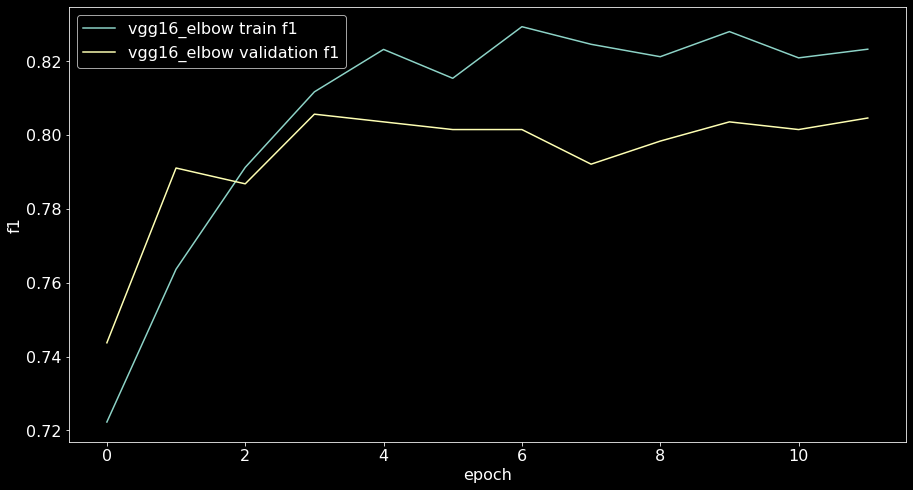

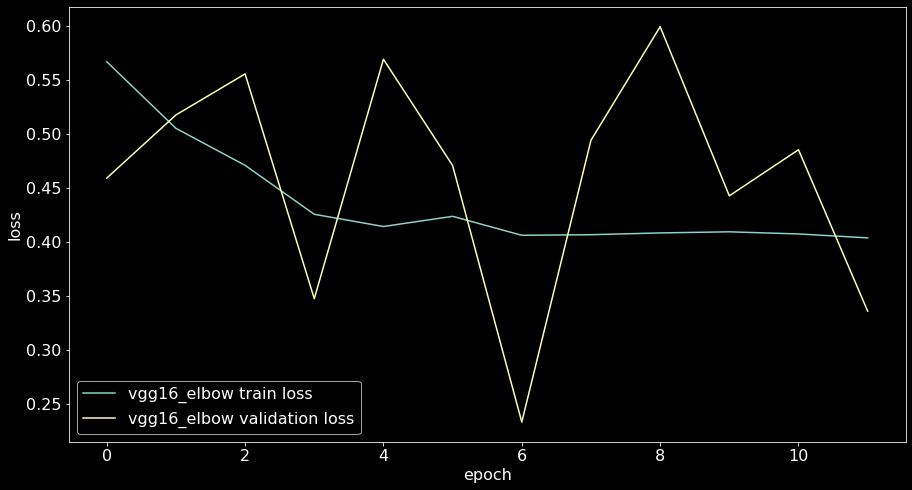

In [ ]:
callbacks_upper= [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True)]
callbacks_full = [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,cooldown=2, verbose=1, mode='auto'),
            ModelCheckpoint(filepath=path_to_saved_models+'XR_ELBOW_best_model_vgg16_val_loss.h5', monitor='val_f1', save_best_only=True)]

upper_layers_optimizer = Adam()
full_network_optimizer = Adam(1e-5)

# vgg16_model,vgg16_hs = train_model(pooling='avg',
#     body_type='XR_ELBOW',
#     full_network_epochs=20,
#     optimizer=optimizer,
#     output_activation='softmax',
#     callbacks_list=callback_list ,
#     verbose=1)


vgg16_model,vgg16_hs = configurable_train_model(batch_size=32,
                                                mlp_hidden_layers=[512],
                                                full_network_epochs=15,
                                                upper_layers_epochs=10,
                                                upper_layers_optimizer=upper_layers_optimizer,
                                                full_network_optimizer=full_network_optimizer,
                                                body_type='XR_ELBOW',
                                                output_activation='softmax',
                                                class_weights=None,
                                                callbacks_upper=callbacks_upper,
                                                callbacks_full=callbacks_full,
                                                verbose=1)



viz_history(hs_dict={'vgg16_elbow':vgg16_hs},metric='f1')
viz_history(hs_dict={'vgg16_elbow':vgg16_hs},metric='loss')

with open(path_to_saved_hist+'XR_ELBOW_hist', 'wb') as file_pi:
        pickle.dump(vgg16_hs.history, file_pi)

In [ ]:
test_datagen = ImageDataGenerator(
      rescale=1./255,
      )
  
test_generator=test_datagen.flow_from_dataframe(
    dataframe=test_data[test_data.Body_Part=='XR_ELBOW'],
    directory=None,
    x_col="Img_Path",
    y_col="Label",
    weight_col=None,
    target_size=(224, 224),
    color_mode="rgb",
    classes=None,
    class_mode="categorical",
    batch_size=128,
    shuffle=False,
    seed=1,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    interpolation="nearest",
    validate_filenames=False
)

Found 465 non-validated image filenames belonging to 2 classes.


In [ ]:
os.listdir(path_to_saved_models)

['XR_ELBOW_best_model_vgg16.h5',
 'XR_ELBOW_best_model_vgg16_val_loss.h5',
 'XR_ELBOW_best_model_vgg16_sgd.h5']

In [ ]:
pred_tmp=vgg16_model.predict(test_generator,verbose=1)

4/4 [==============================] - 5s 1s/step


In [ ]:
y_pred=np.argmax(pred_tmp,axis=1)

In [ ]:
true_labels=np.asarray(list(map(int, test_data[test_data.Body_Part=='XR_ELBOW'].Label.values)))

In [ ]:
cohen_kappa_score(true_labels,y_pred)

0.6290352504638219

In [ ]:
store_results['vgg_elbow_no_class_weights']=evaluate_model(body_part='XR_ELBOW',model=vgg16_model)

  0%|          | 0/10 [00:00<?, ?it/s]

Found 465 non-validated image filenames belonging to 2 classes.
4/4 [==============================] - 9s 2s/step


 10%|█         | 1/10 [00:08<01:17,  8.63s/it]

4/4 [==============================] - 9s 2s/step


 20%|██        | 2/10 [00:18<01:10,  8.87s/it]

4/4 [==============================] - 9s 2s/step


 30%|███       | 3/10 [00:27<01:03,  9.01s/it]

4/4 [==============================] - 9s 2s/step


 40%|████      | 4/10 [00:36<00:54,  9.10s/it]

4/4 [==============================] - 9s 2s/step


 50%|█████     | 5/10 [00:46<00:45,  9.20s/it]

4/4 [==============================] - 9s 2s/step


 60%|██████    | 6/10 [00:55<00:36,  9.24s/it]

4/4 [==============================] - 9s 2s/step


 70%|███████   | 7/10 [01:05<00:27,  9.33s/it]

4/4 [==============================] - 9s 2s/step


 80%|████████  | 8/10 [01:14<00:18,  9.36s/it]

4/4 [==============================] - 9s 2s/step


 90%|█████████ | 9/10 [01:23<00:09,  9.35s/it]

4/4 [==============================] - 9s 2s/step


100%|██████████| 10/10 [01:33<00:00,  9.31s/it]


In [ ]:
store_results['vgg_elbow_no_class_weights'][0]

0.6450051849291394

In [ ]:
for k,v in store_results.items():
  print('{}: Kappa Score {:.3f} f1 {:.3f}'.format(k,v[0],v[1]))

vgg_elbow_class_weights: Kappa Score 0.109 f1 0.189
vgg_elbow_no_class_weights: Kappa Score 0.645 f1 0.764


Load Model from drive


In [ ]:
# load model from drive
load_model_elbow=keras.models.load_model(path_to_saved_models+os.listdir(path_to_saved_models)[1],custom_objects={
        "f1":f1})

In [ ]:
store_results['vgg_elbow_no_class_weights']=evaluate_model(body_part='XR_ELBOW',model=load_model_elbow)

  0%|          | 0/10 [00:00<?, ?it/s]

Found 465 non-validated image filenames belonging to 2 classes.
4/4 [==============================] - 170s 42s/step


 10%|█         | 1/10 [04:00<36:06, 240.71s/it]

#### Let's try SGD

Found 3962 non-validated image filenames belonging to 2 classes.
Found 969 non-validated image filenames belonging to 2 classes.
Epoch 1/1
123/123 [==============================] - 75s 607ms/step - loss: 0.6806 - accuracy: 0.5893 - f1: 0.5891 - val_loss: 0.6311 - val_accuracy: 0.6240 - val_f1: 0.6240
Finished training upper layers.
------------------
Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
__________________________________

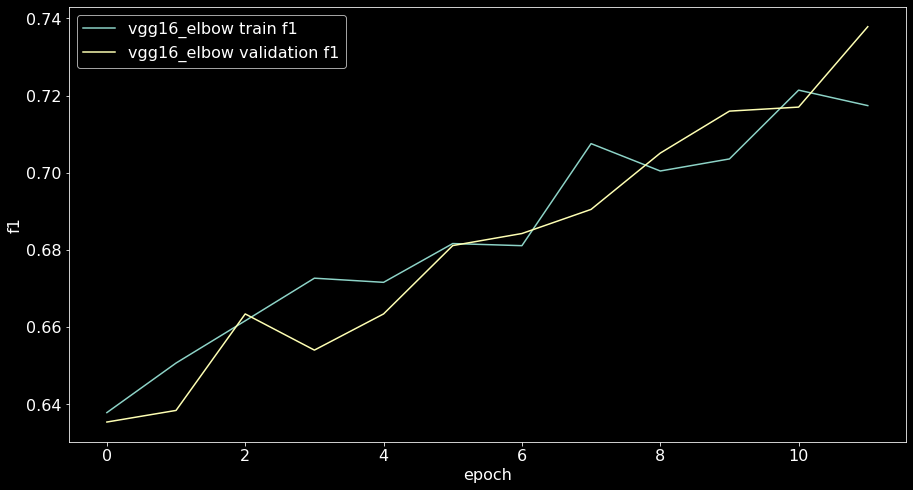

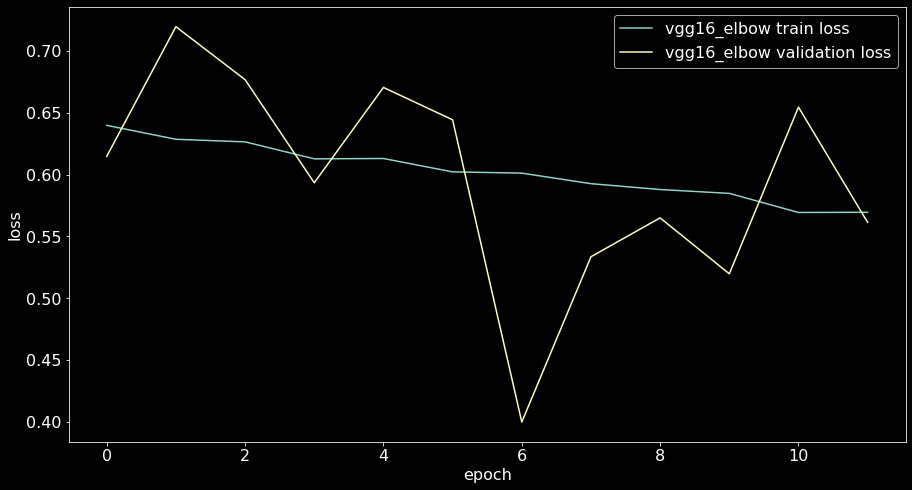

In [ ]:
callbacks_upper= [EarlyStopping(monitor='val_loss', patience=3, verbose=1,restore_best_weights=True)]
callbacks_full = [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True),
                #ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,cooldown=2, verbose=1, mode='auto'),
            ModelCheckpoint(filepath=path_to_saved_models+'XR_ELBOW_best_model_vgg16_sgd.h5', monitor='val_f1', save_best_only=True)]

upper_layers_optimizer = Adam()
full_network_optimizer =  SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)

# vgg16_model,vgg16_hs = train_model(pooling='avg',
#     body_type='XR_ELBOW',
#     full_network_epochs=20,
#     optimizer=optimizer,
#     output_activation='softmax',
#     callbacks_list=callback_list ,
#     verbose=1)


vgg16_model,vgg16_hs = configurable_train_model(batch_size=32,
                                                mlp_hidden_layers=[512],
                                                full_network_epochs=25,
                                                upper_layers_epochs=1,
                                                upper_layers_optimizer=upper_layers_optimizer,
                                                full_network_optimizer=full_network_optimizer,
                                                body_type='XR_ELBOW',
                                                output_activation='softmax',
                                                class_weights=None,
                                                callbacks_upper=callbacks_upper,
                                                callbacks_full=callbacks_full,
                                                verbose=1)



viz_history(hs_dict={'vgg16_elbow':vgg16_hs},metric='f1')
viz_history(hs_dict={'vgg16_elbow':vgg16_hs},metric='loss')

with open(path_to_saved_hist+'XR_ELBOW_hist', 'wb') as file_pi:
        pickle.dump(vgg16_hs.history, file_pi)

#### FINGER

In [ ]:
optimizer = Adam(1e-4)
callback_list = [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,cooldown=2, verbose=1, mode='auto'),
            ModelCheckpoint(filepath=path_to_saved_models+'XR_FINGER_best_model_vgg16.h5', monitor='val_loss', save_best_only=True)]


vgg16_model,vgg16_hs = train_model(pooling='avg',
    body_type='XR_FINGER',
    full_network_epochs=10,
    optimizer=optimizer,
    output_activation='softmax',
    callbacks_list=callback_list ,
    verbose=1)

viz_history(hs_dict={'vgg16_finger':vgg16_hs},metric='f1')
viz_history(hs_dict={'vgg16_finger':vgg16_hs},metric='loss')

with open(path_to_saved_hist+'XR_FINGER_hist', 'wb') as file_pi:
        pickle.dump(vgg16_hs.history, file_pi)

clean_up(vgg16_model)



#### HAND

In [ ]:
optimizer = Adam(1e-4)
callback_list = [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,cooldown=2, verbose=1, mode='auto'),
            ModelCheckpoint(filepath=path_to_saved_models+'XR_HAND_best_model_vgg16.h5', monitor='val_loss', save_best_only=True)]


vgg16_model,vgg16_hs = train_model(pooling='avg',
    body_type='XR_HAND',
    full_network_epochs=10,
    optimizer=optimizer,
    output_activation='softmax',
    callbacks_list=callback_list ,
    verbose=1)

viz_history(hs_dict={'vgg16_hand':vgg16_hs},metric='f1')
viz_history(hs_dict={'vgg16_hand':vgg16_hs},metric='loss')


with open(path_to_saved_hist+'XR_HAND_hist', 'wb') as file_pi:
        pickle.dump(vgg16_hs.history, file_pi)

clean_up(vgg16_model)


#### HUMEROUS

In [ ]:
optimizer = Adam(1e-4)
callback_list = [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,cooldown=2, verbose=1, mode='auto'),
            ModelCheckpoint(filepath=path_to_saved_models+'XR_HUMERUS_best_model_vgg16.h5', monitor='val_loss', save_best_only=True)]


vgg16_model,vgg16_hs = train_model(pooling='avg',
    body_type='XR_HUMERUS',
    full_network_epochs=10,
    optimizer=optimizer,
    output_activation='softmax',
    callbacks_list=callback_list ,
    verbose=1)

viz_history(hs_dict={'vgg16_humerus':vgg16_hs},metric='f1')
viz_history(hs_dict={'vgg16_humerus':vgg16_hs},metric='loss')

with open(path_to_saved_hist+'XR_HUMERUS_hist', 'wb') as file_pi:
        pickle.dump(vgg16_hs.history, file_pi)

clean_up(vgg16_model)

#### FOREARM

In [ ]:
optimizer = Adam(1e-4)
callback_list = [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,cooldown=2, verbose=1, mode='auto'),
            ModelCheckpoint(filepath=path_to_saved_models+'XR_FOREARM_best_model_vgg16.h5', monitor='val_loss', save_best_only=True)]


vgg16_model,vgg16_hs = train_model(pooling='avg',
    body_type='XR_FOREARM',
    full_network_epochs=10,
    optimizer=optimizer,
    output_activation='softmax',
    callbacks_list=callback_list ,
    verbose=1)

viz_history(hs_dict={'vgg16_forearm':vgg16_hs},metric='f1')
viz_history(hs_dict={'vgg16_forearm':vgg16_hs},metric='loss')

with open(path_to_saved_hist+'XR_FOREARM_hist', 'wb') as file_pi:
        pickle.dump(vgg16_hs.history, file_pi)


clean_up(vgg16_model)


#### SHOULDER

In [ ]:
optimizer = Adam(1e-4)
callback_list = [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,cooldown=2, verbose=1, mode='auto'),
            ModelCheckpoint(filepath=path_to_saved_models+'XR_SHOULDER_best_model_vgg16.h5', monitor='val_loss', save_best_only=True)]


vgg16_model,vgg16_hs = train_model(pooling='avg',
    body_type='XR_SHOULDER',
    full_network_epochs=10,
    optimizer=optimizer,
    output_activation='softmax',
    callbacks_list=callback_list ,
    verbose=1)

viz_history(hs_dict={'vgg16_shoulder':vgg16_hs},metric='f1')
viz_history(hs_dict={'vgg16_shoulder':vgg16_hs},metric='loss')

with open(path_to_saved_hist+'XR_SHOULDER_hist', 'wb') as file_pi:
        pickle.dump(vgg16_hs.history, file_pi)


clean_up(vgg16_model)

#### WRIST

In [ ]:
optimizer = Adam(1e-4)
callback_list = [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,cooldown=2, verbose=1, mode='auto'),
            ModelCheckpoint(filepath=path_to_saved_models+'XR_WRIST_best_model_vgg16.h5', monitor='val_loss', save_best_only=True)]


vgg16_model,vgg16_hs = train_model(pooling='avg',
    body_type='XR_WRIST',
    full_network_epochs=10,
    optimizer=optimizer,
    output_activation='softmax',
    callbacks_list=callback_list ,
    verbose=1)

viz_history(hs_dict={'vgg16_wrist':vgg16_hs},metric='f1')
viz_history(hs_dict={'vgg16_wrist':vgg16_hs},metric='loss')

with open(path_to_saved_hist+'XR_WRIST_hist', 'wb') as file_pi:
        pickle.dump(vgg16_hs.history, file_pi)


clean_up(vgg16_model)